In [1]:
import math
from pathlib import Path
from typing import  List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
# CONSTANTS
SPLIT_DATA_FOLDER = Path().parent / 'split_data'
NORMAL_DATA = SPLIT_DATA_FOLDER / 'normal'
FAULT_DATA = SPLIT_DATA_FOLDER / 'fault'

In [4]:
def load_data(data_folder: Path) -> pd.DataFrame:
    data = []

    for filename in data_folder.glob('*.csv'):
        df = pd.read_csv(filename, names=['TIME', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
        data.append(df)

    frame = pd.concat(data, ignore_index=True)
    return frame

## Load data

In [5]:
df_normal = load_data(data_folder=NORMAL_DATA)
df_fault = load_data(data_folder=FAULT_DATA)

## Correlation

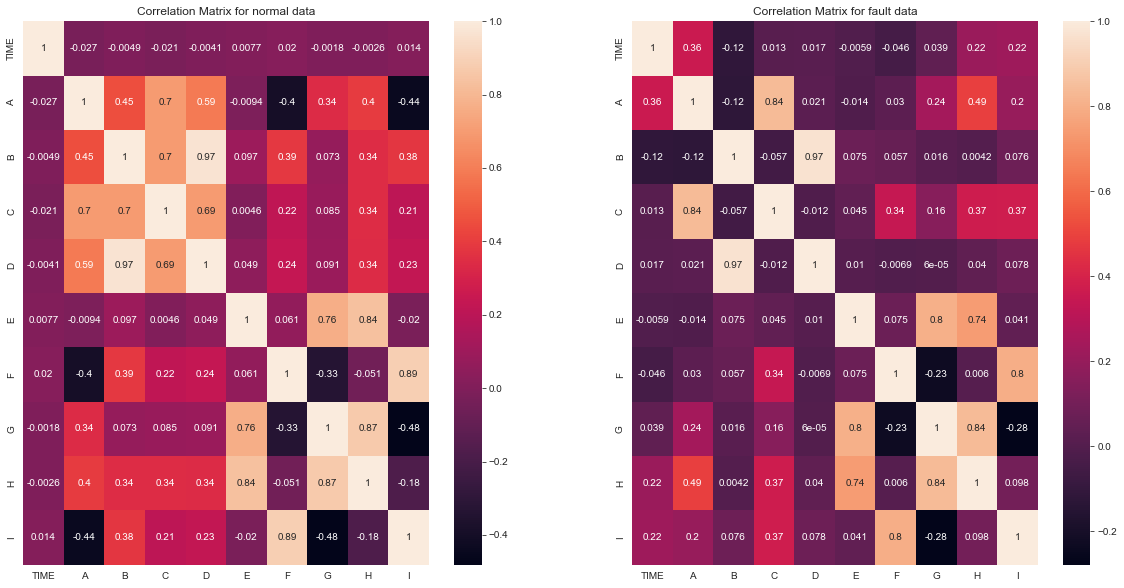

In [6]:
# Normal data correlation
corr_matrix_normal = df_normal.corr()

# Fault data correlation
corr_matrix_fault = df_fault.corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set(title = "Correlation Matrix for normal data")
ax2.set(title = "Correlation Matrix for fault data")

sn.heatmap(corr_matrix_normal, annot=True, ax=ax1)
sn.heatmap(corr_matrix_fault, annot=True, ax=ax2)

plt.show()

## Histogram

In [7]:
column_hist: List[str] = list(df_normal.columns)
column_hist.remove('TIME')

### Histogram for normal data

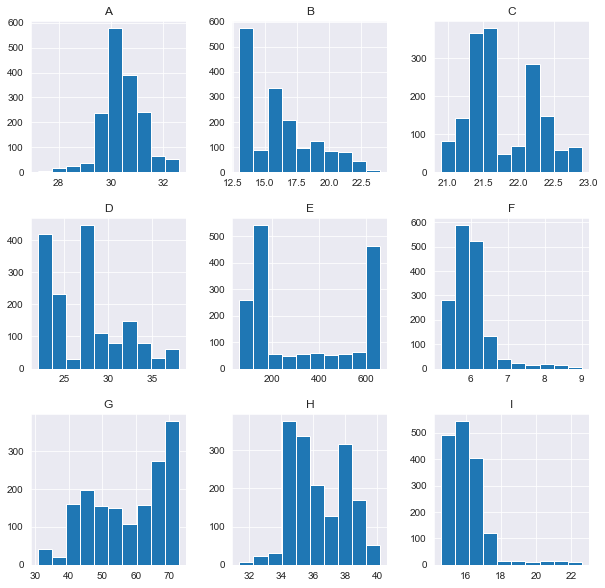

In [8]:
hist_normal = df_normal.hist(column=column_hist, figsize=(10,10))

### Histogram for fault data

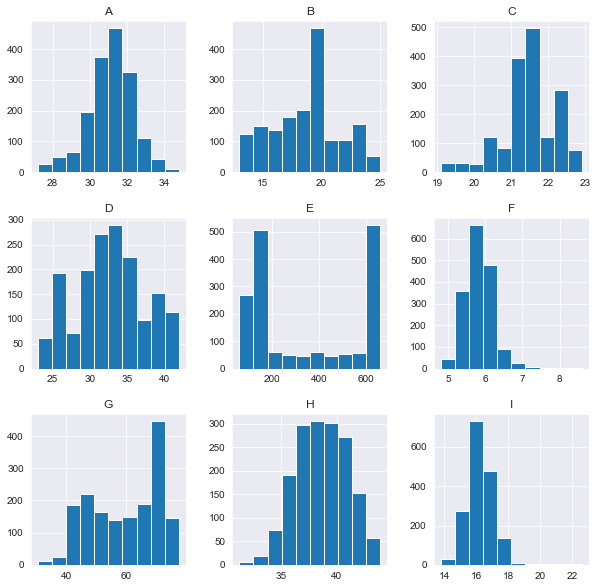

In [9]:
hist_fault = df_fault.hist(column=column_hist, figsize=(10,10))

## Statistic analysis

### Normal Data

In [10]:
df_normal.describe()

,TIME,A,B,C,D,E,F,G,H,I
count,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000
mean,16.000000,30.412538,16.251978,21.732136,27.356056,308.764455,6.004504,57.479002,36.323798,16.064455
std,8.946995,0.778284,2.482789,0.482308,4.134368,231.419114,0.562396,11.119428,1.721049,1.205308
min,1.000000,27.200000,13.000000,20.900000,22.000000,60.000000,5.200000,30.800000,31.400000,14.600000
25%,8.000000,29.900000,14.000000,21.400000,23.000000,120.000000,5.600000,47.300000,34.900000,15.300000
50%,16.000000,30.400000,16.000000,21.500000,27.000000,180.000000,5.900000,59.700000,35.900000,15.900000
75%,24.000000,30.900000,18.000000,22.200000,29.000000,600.000000,6.200000,68.400000,37.900000,16.600000
max,31.000000,32.600000,24.000000,22.900000,38.000000,660.000000,9.000000,72.800000,40.200000,22.600000


### Fault Data

In [11]:
df_fault.describe()

,TIME,A,B,C,D,E,F,G,H,I
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,16.000000,31.103405,18.659498,21.439367,32.762246,322.831541,5.839606,59.551792,38.608602,16.287157
std,8.946945,1.214770,2.801451,0.742500,4.837056,237.406512,0.420602,11.291858,2.304267,0.908331
min,1.000000,27.200000,13.000000,19.100000,23.000000,60.000000,4.800000,30.600000,31.300000,13.800000
25%,8.000000,30.400000,17.000000,21.100000,29.000000,120.000000,5.600000,48.800000,36.900000,15.700000
50%,16.000000,31.200000,19.000000,21.400000,33.000000,240.000000,5.800000,61.400000,38.600000,16.200000
75%,24.000000,31.900000,20.000000,22.000000,36.000000,600.000000,6.100000,70.400000,40.400000,16.800000
max,31.000000,34.800000,25.000000,22.900000,42.000000,660.000000,8.600000,77.400000,43.900000,22.600000


In [14]:
def split_data_by_time(df: pd.DataFrame, time) -> pd.DataFrame:
    frame = df.loc[df['TIME'] == time]
    return frame

Data correlation(for every timestamp)

In [15]:
def correlation_for_timestamps(df: pd.DataFrame):
    figure, axis = plt.subplots(8, 4, figsize=(40, 80))

    for ts in range(0, 31):
        data = split_data_by_time(df, ts + 1)
        corr = data.corr()
        x = math.floor(ts / 4)
        y = ts - x * 4
        axis[x, y].set_title("Correlation for t=" + str(ts + 1) + "min")
        sn.heatmap(corr, annot=True, ax=axis[x, y])

    plt.show()

Normal data correlation for every timestamp

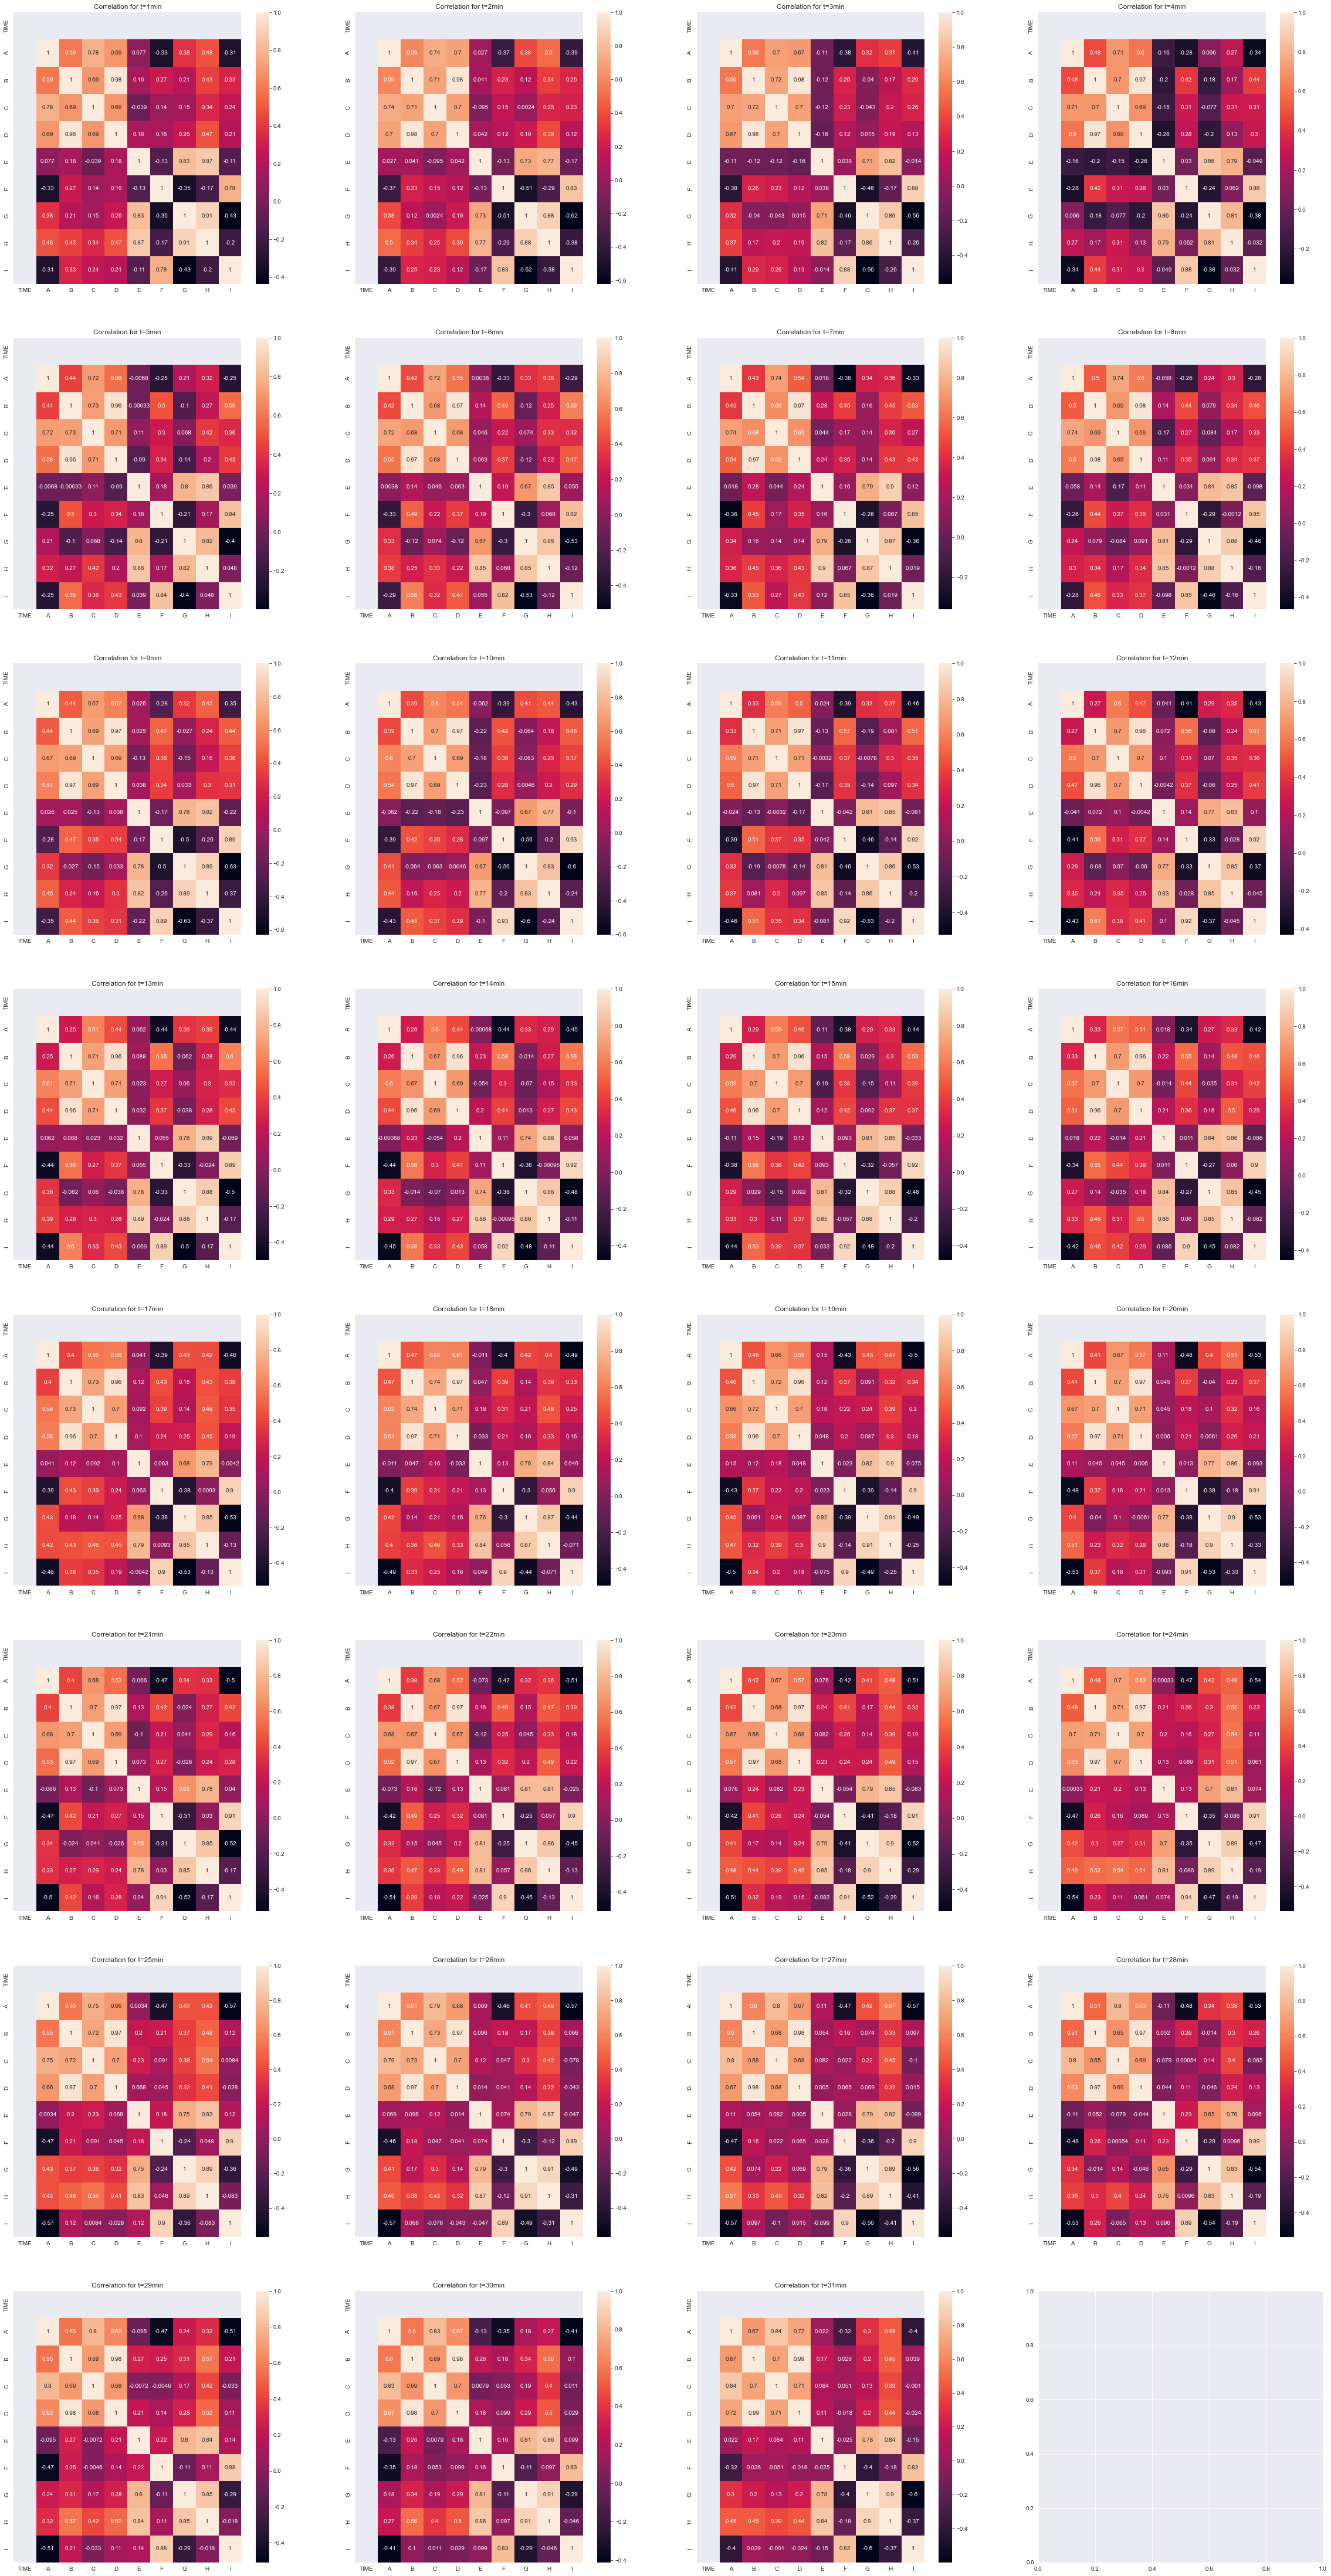

In [16]:
correlation_for_timestamps(df_normal)

Fault data correlation for every timestamp

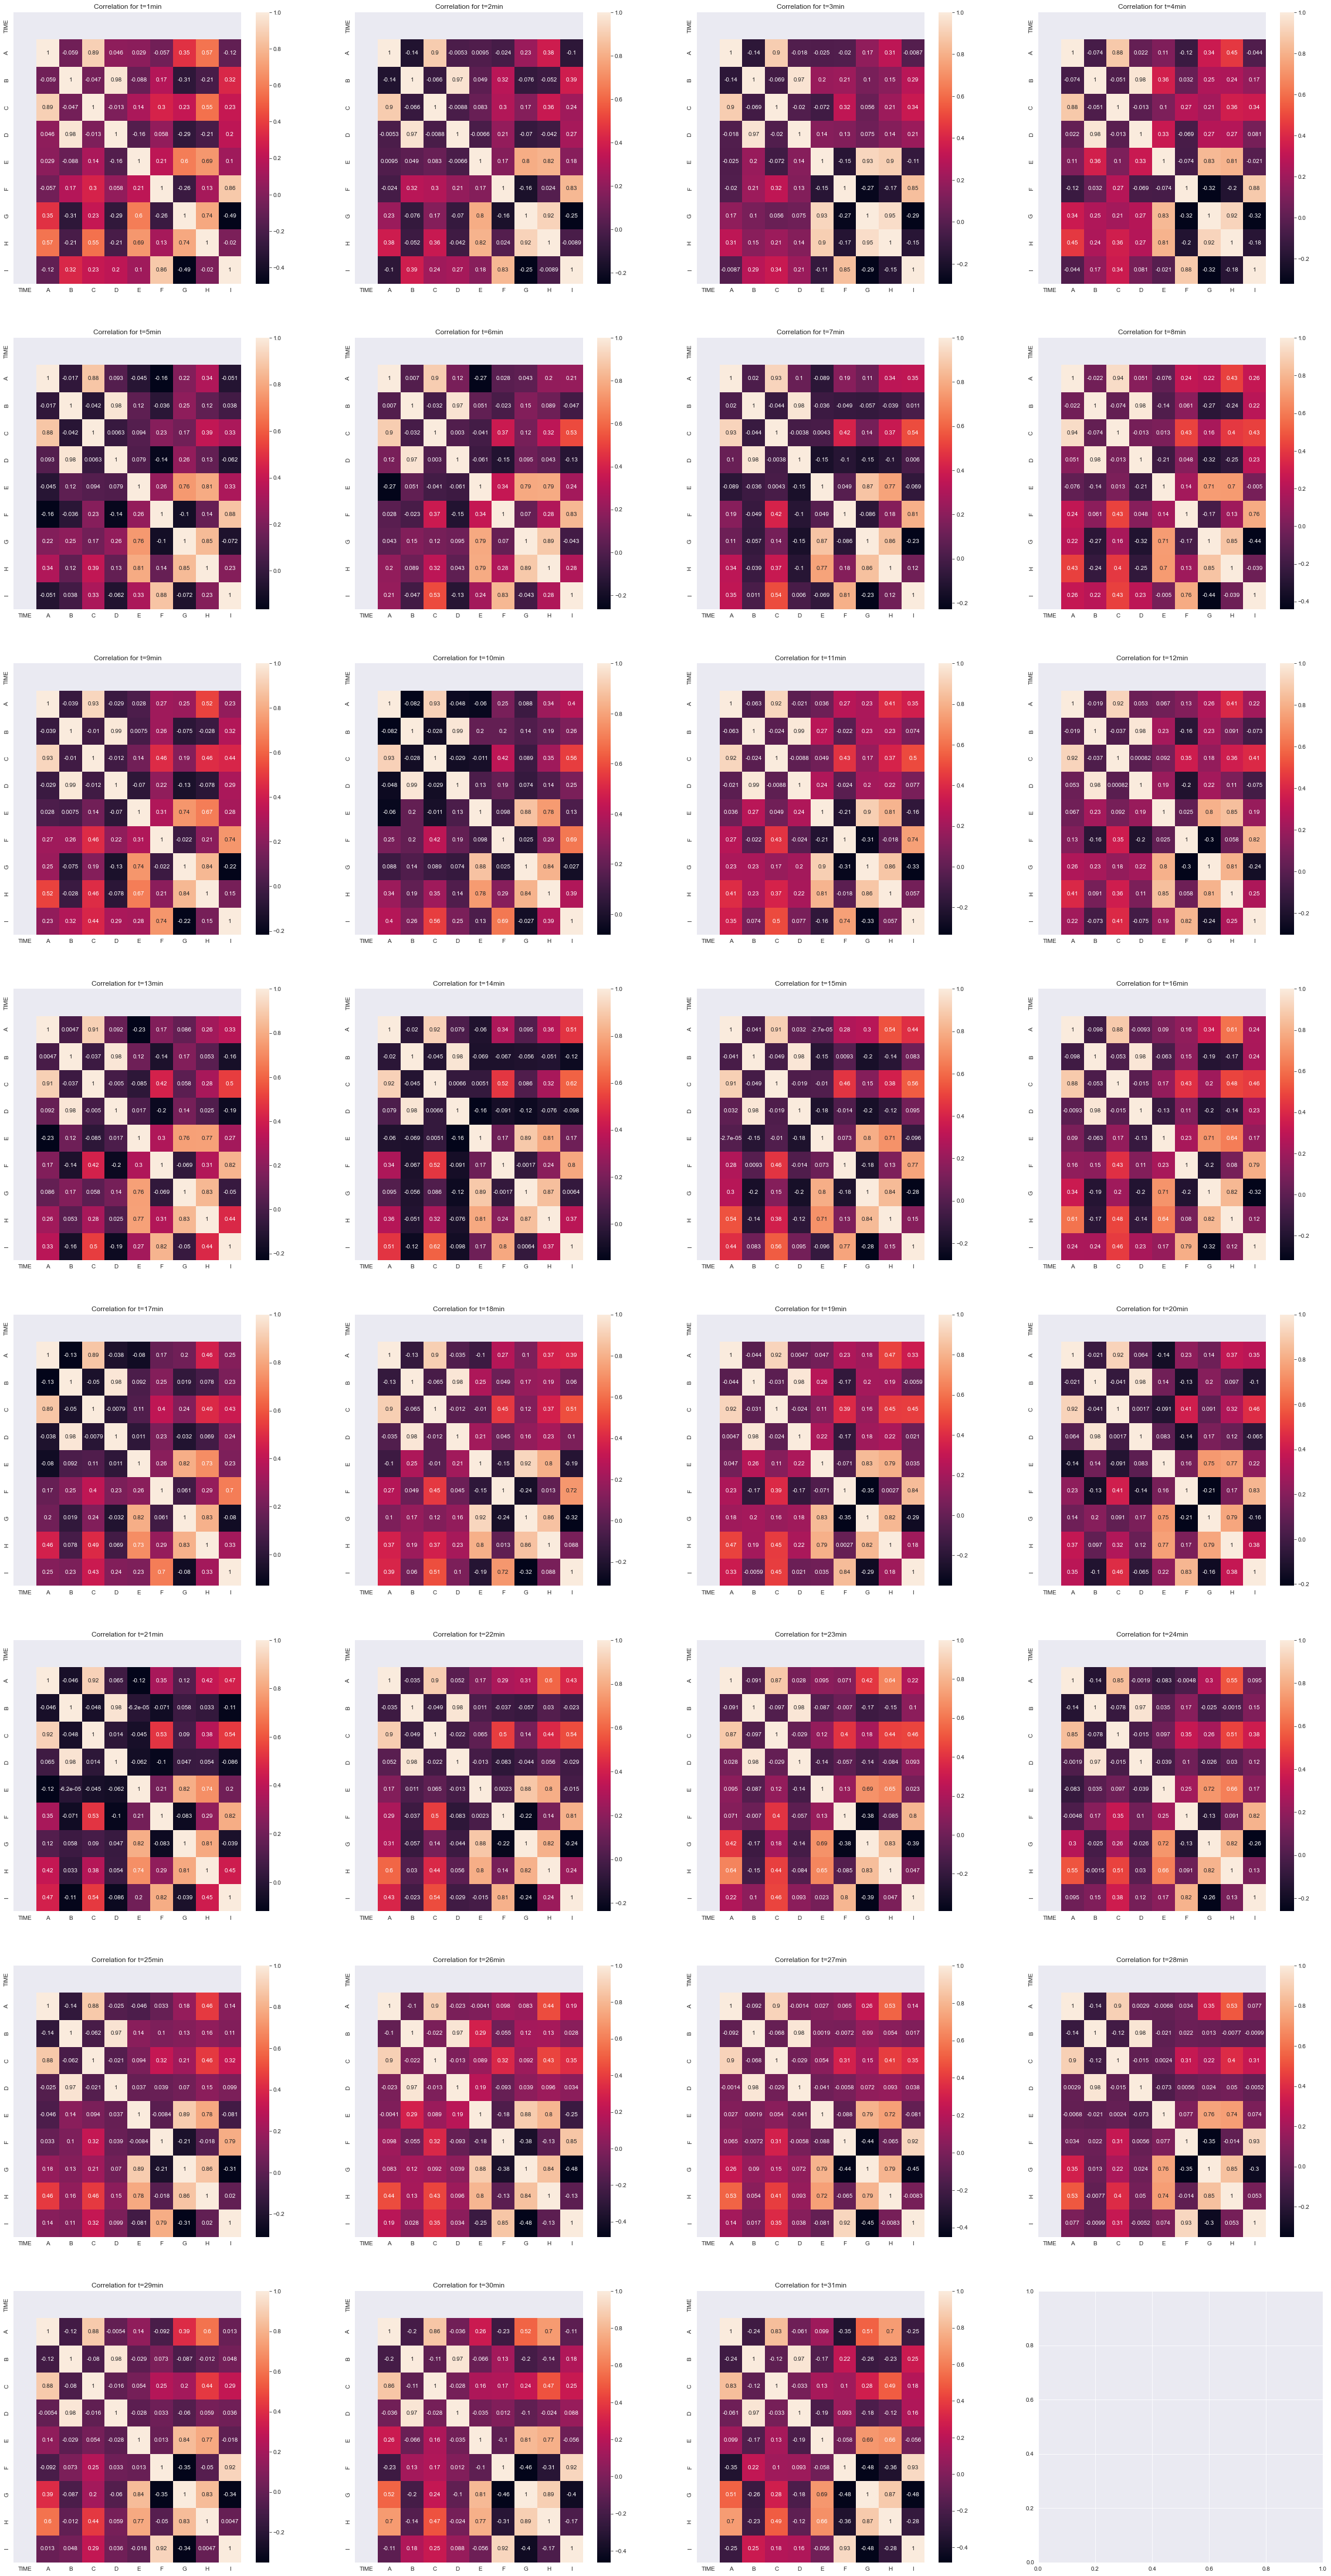

In [17]:
correlation_for_timestamps(df_fault)

In [18]:
def display_means_and_points(ndf: pd.DataFrame, fdf: pd.DataFrame):
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
    ndf_mean = ndf.groupby('TIME')['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'].mean()
    fdf_mean = fdf.groupby('TIME')['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'].mean()

    for index, param in enumerate(labels):
        figure, axis = plt.subplots(1, 3, figsize=(24, 10), sharex=True, sharey=True)
        axis[0].set_title("All " + param + "values and its mean for normal data")
        axis[0].scatter(ndf.iloc[:, 0], ndf.iloc[:, index + 1], marker='o')
        axis[0].plot(ndf_mean.index, ndf_mean[param], linewidth=4, color='red')
        axis[1].set_title("All " + param + "values and its mean for fault data")
        axis[1].scatter(fdf.iloc[:, 0], fdf.iloc[:, index + 1], marker='o')
        axis[1].plot(fdf_mean.index, fdf_mean[param], linewidth=4, color='red')
        axis[2].set_title("Men values of " + param + "for fault (green) and normal (purple) data")
        axis[2].plot(ndf_mean.index, ndf_mean[param], linewidth=3, color='purple')
        axis[2].plot(fdf_mean.index, fdf_mean[param], linewidth=3, color='green')

C:\Users\micha\anaconda3\envs\labs\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\micha\anaconda3\envs\labs\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


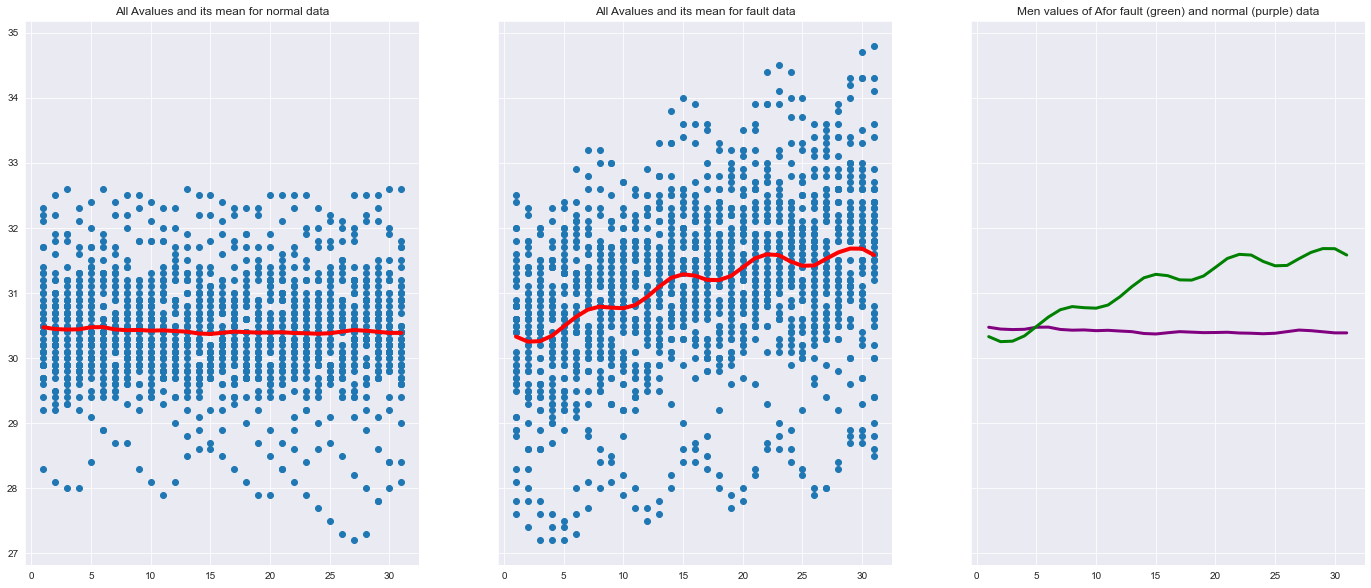

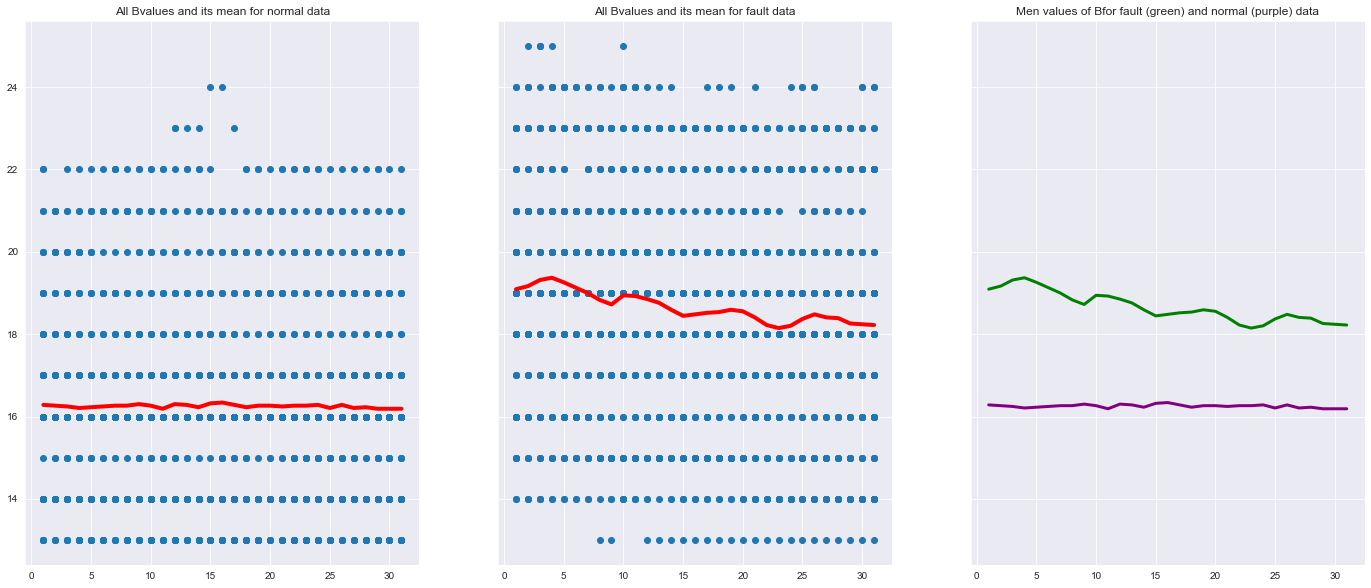

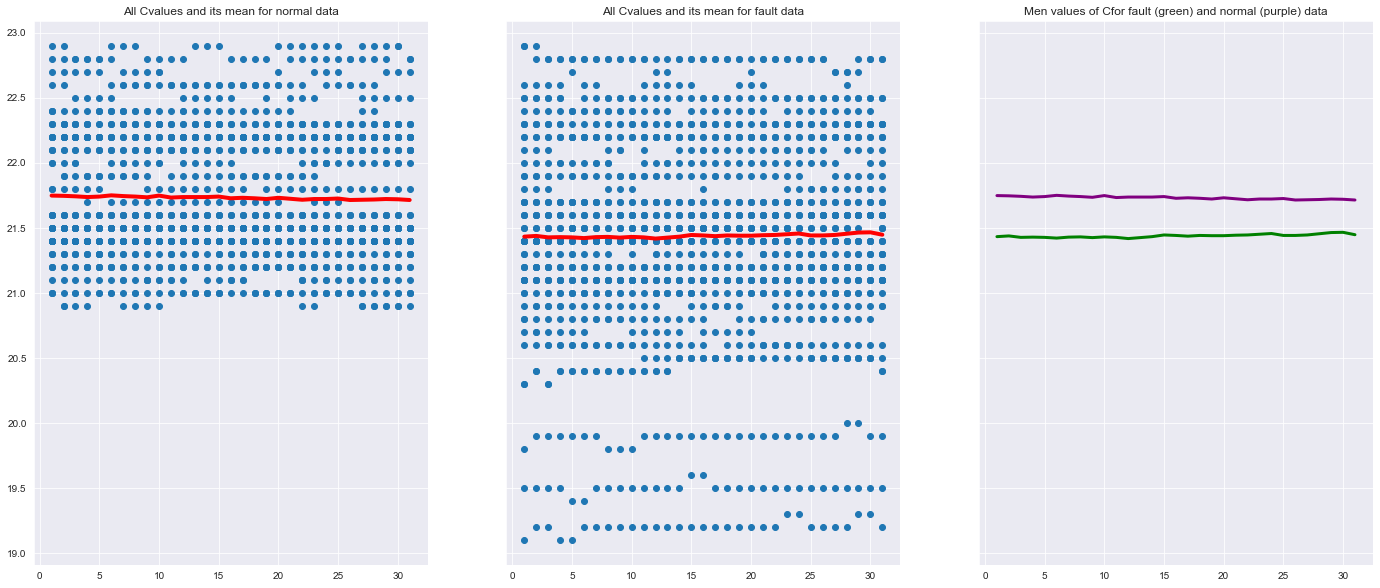

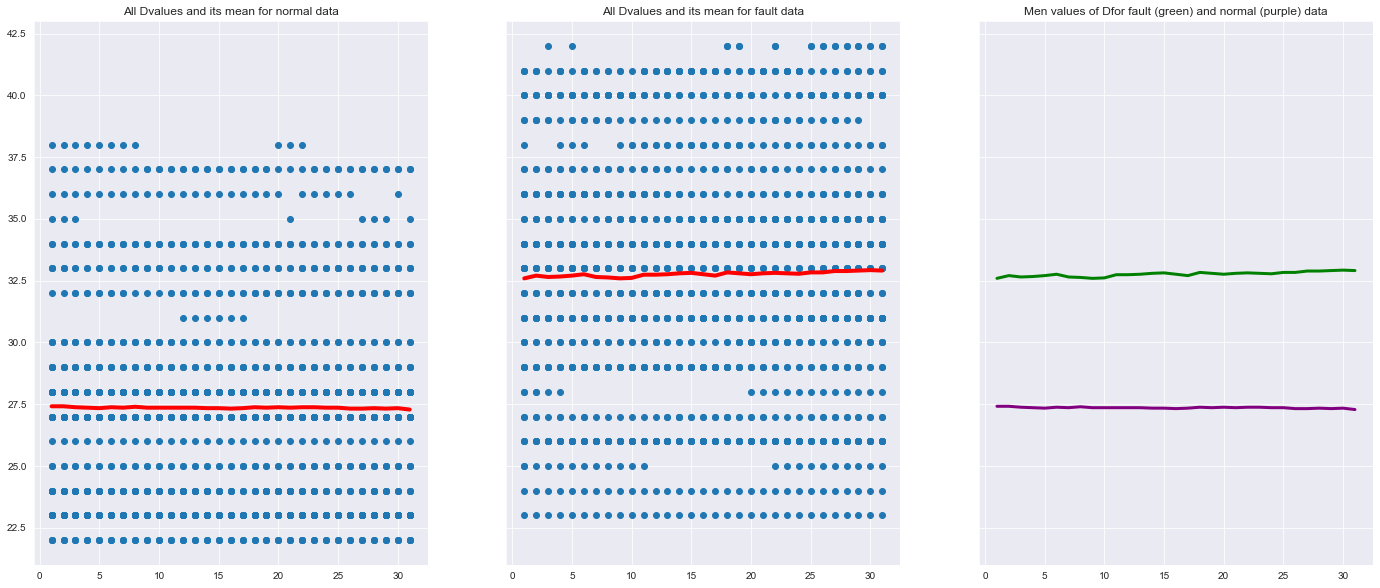

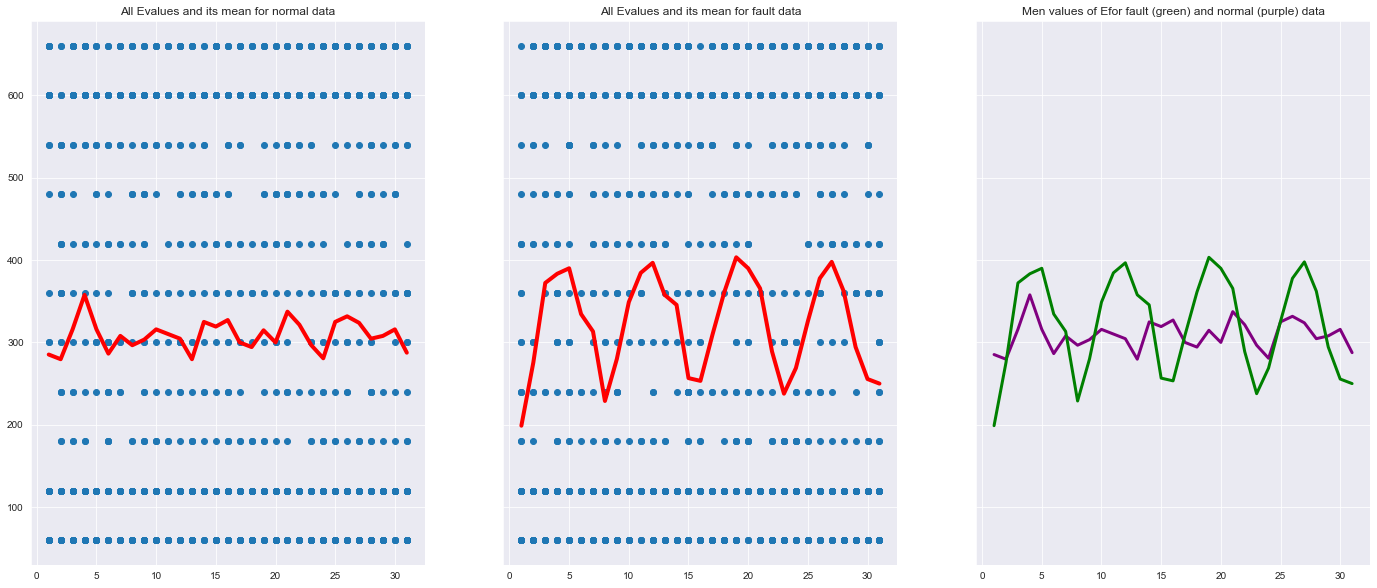

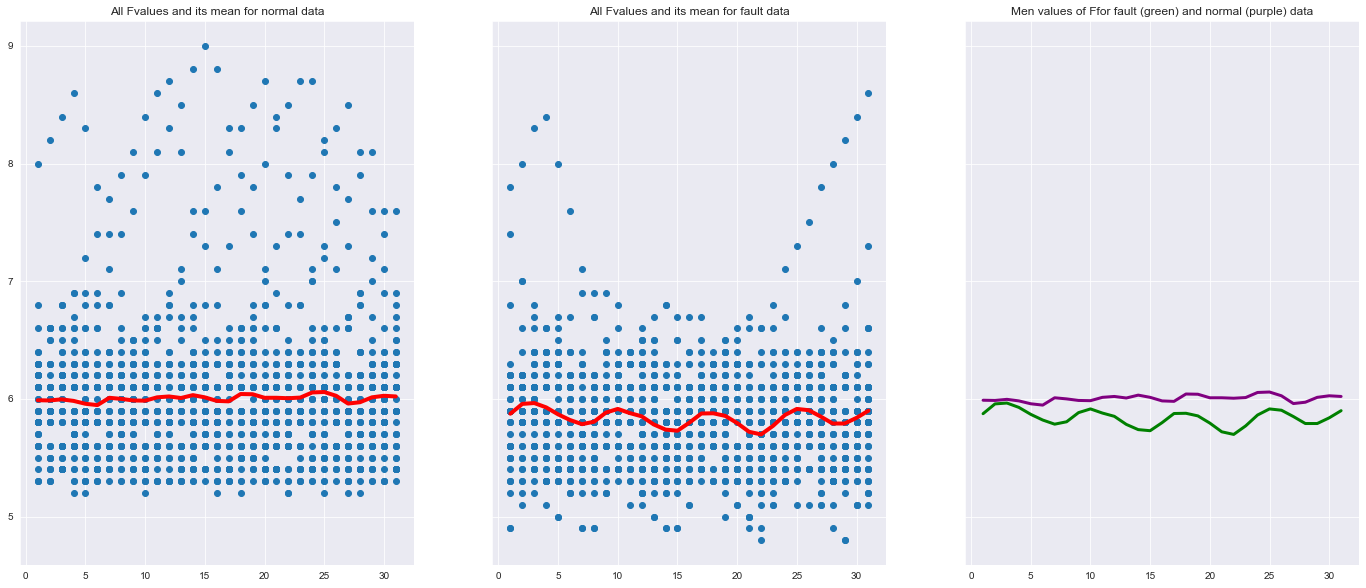

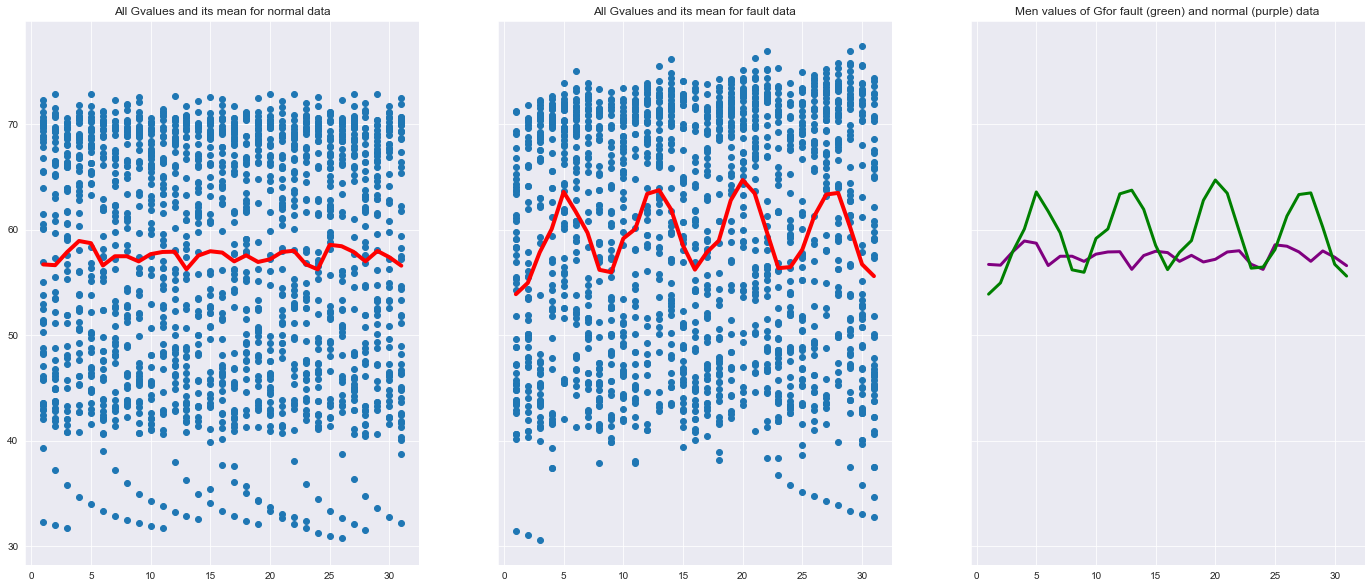

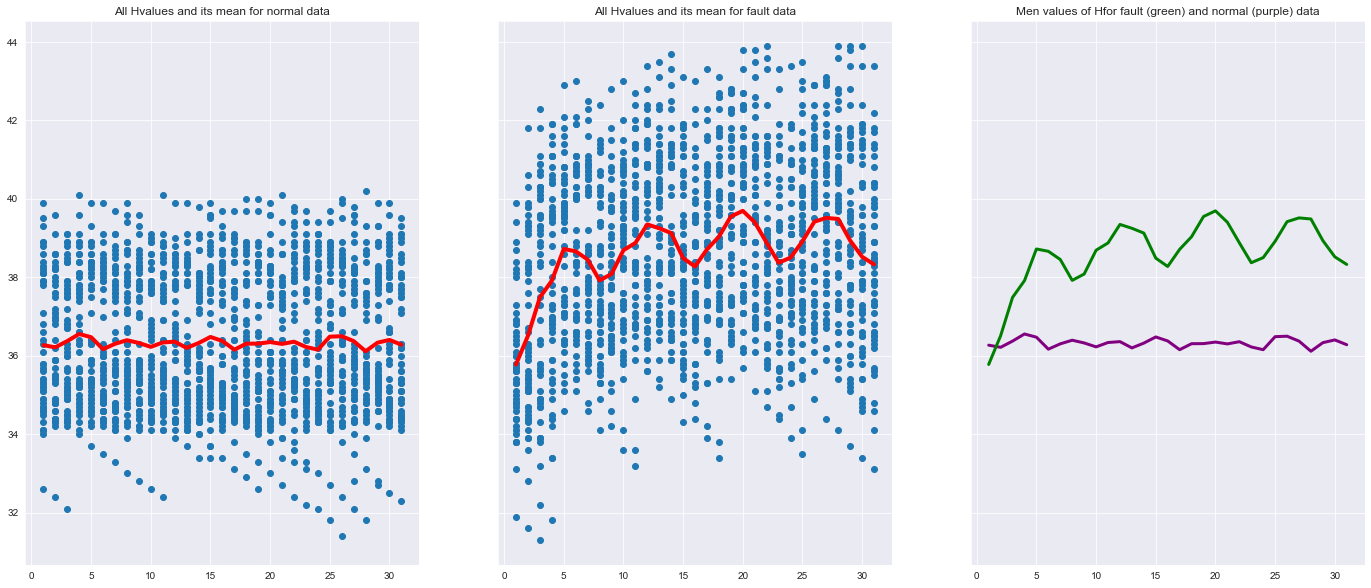

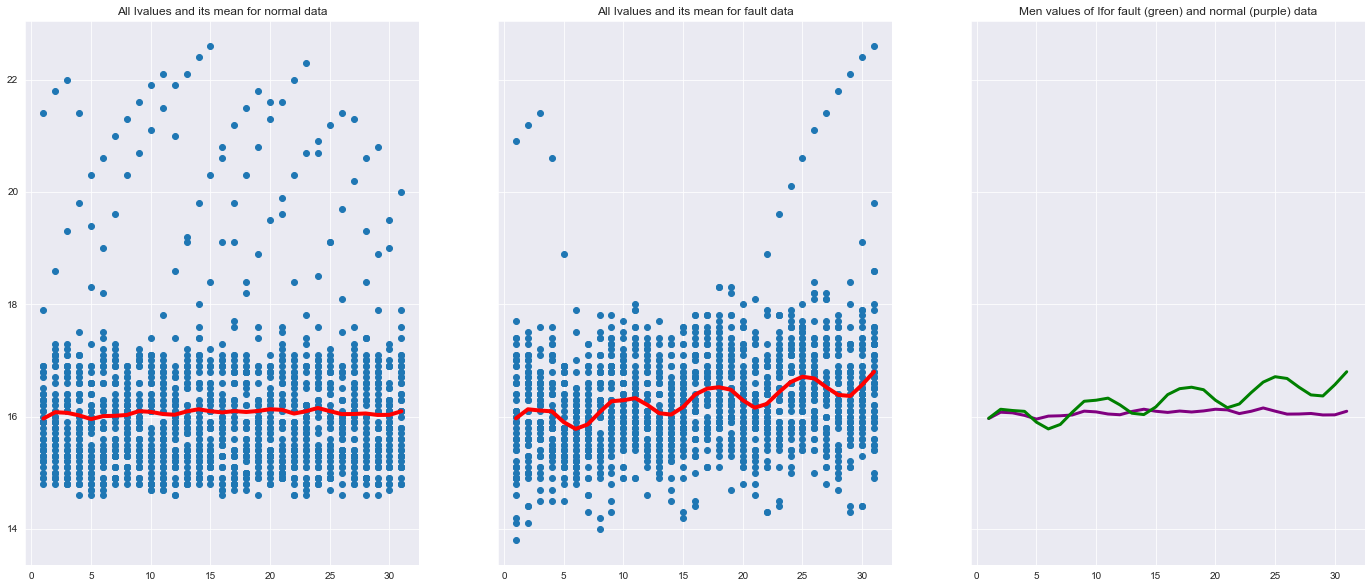

In [19]:
display_means_and_points(df_normal, df_fault)